<a href="https://colab.research.google.com/github/WoradeeKongthong/DataCamp2020_homework/blob/master/DeepLearningHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1 : predict คนไข้ว่าเป็นเบาหวานหรือไม่  
data type : structured data  
model : ANN
 

In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt

## Load dataset ของ Pima Indians

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv', 
                 header=None, 
                 names=['num_of_pregnant','plasma_glucose_conc','blood_pressure','triceps_skin_food_thickness','2hrs_insulin','bmi','diab_pedigree_fn','age','diabetes'])
df

,num_of_pregnant,plasma_glucose_conc,blood_pressure,triceps_skin_food_thickness,2hrs_insulin,bmi,diab_pedigree_fn,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Explore the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   num_of_pregnant              768 non-null    int64  
 1   plasma_glucose_conc          768 non-null    int64  
 2   blood_pressure               768 non-null    int64  
 3   triceps_skin_food_thickness  768 non-null    int64  
 4   2hrs_insulin                 768 non-null    int64  
 5   bmi                          768 non-null    float64
 6   diab_pedigree_fn             768 non-null    float64
 7   age                          768 non-null    int64  
 8   diabetes                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Note : There is no missing value

In [4]:
df.describe()

,num_of_pregnant,plasma_glucose_conc,blood_pressure,triceps_skin_food_thickness,2hrs_insulin,bmi,diab_pedigree_fn,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# explore the label 
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

## Create train, test dataset

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# choose X and y
X = df.drop(['diabetes'], axis=1).copy()
y = df['diabetes'].copy()

In [8]:
# create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (614, 8)
y_train shape =  (614,)
X_test shape =  (154, 8)
y_test shape =  (154,)


## The model

In [9]:
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# create the model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [11]:
# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________


In [13]:
# fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.2, verbose=0)

## Plot the learning curve

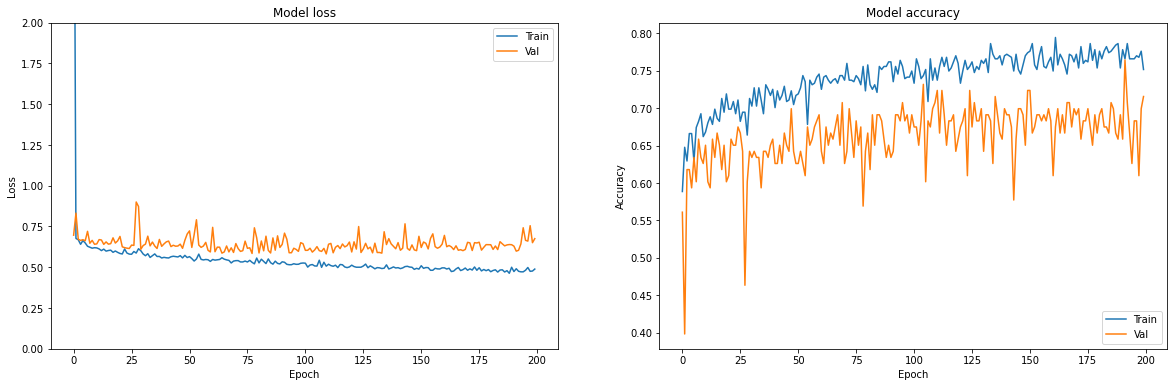

In [14]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim((0,2))

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

## Save the model

In [15]:
model.save('diabetes_classifier.h5')

## Model Evaluation

In [16]:
from keras.models import load_model

In [17]:
model = load_model('diabetes_classifier.h5')

In [18]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.6753


[0.7009730935096741, 0.6753246784210205]

## Make prediction on test set

In [19]:
y_pred = model.predict(X_test)

In [20]:
result_df = pd.DataFrame()
result_df['y_test'] = y_test
result_df['y_pred'] = y_pred.round()
result_df

,y_test,y_pred
699,0,0.0
226,0,0.0
169,0,0.0
320,0,0.0
402,1,0.0
...,...,...
381,0,0.0
538,0,0.0
286,0,1.0
238,1,0.0


In [21]:
from sklearn import metrics

In [22]:
# confusion metrix
cm = metrics.confusion_matrix(y_test, y_pred.round())
cm

array([[86, 18],
       [32, 18]])

# Homework 2.1 : MNIST dataset with ANN  
input type : 1d array    
model : ANN

## Load the dataset (Train-test datasets)

In [23]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (60000, 28, 28)
y_train shape =  (60000,)
X_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


label =  2


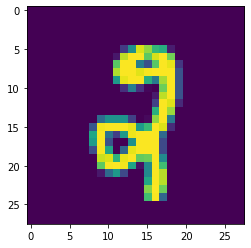

In [24]:
# data example
randnum = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[randnum])
print('label = ', y_train[randnum])

## Data Preparation

In [25]:
# ANN accept 1d input
# convert 28x28 pixels to 1d-vector with 28x28 elements
X_train_1d = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test_1d = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

In [26]:
# convert the label (y_train and y_test) to be categorical 
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)

In [27]:
print('X_train_1d shape = ', X_train_1d.shape)
print('y_train_onehot shape = ', y_train_onehot.shape)
print('X_test_1d shape = ', X_test_1d.shape)
print('y_test_onehot shape = ', y_test_onehot.shape)

X_train_1d shape =  (60000, 784)
y_train_onehot shape =  (60000, 10)
X_test_1d shape =  (10000, 784)
y_test_onehot shape =  (10000, 10)


In [28]:
# check X_train data type
print(X_train_1d.dtype)
print(X_train_1d.min())
print(X_train_1d.max())

uint8
0
255


In [29]:
# Normalization
X_train_1d = X_train_1d.astype('float32')/255
X_test_1d = X_test_1d.astype('float32')/255

In [30]:
# check X_train data type
print(X_train_1d.dtype)
print(X_train_1d.min())
print(X_train_1d.max())

float32
0.0
1.0


## The model

In [31]:
# create the ANN model
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(X_train_1d.shape[1],)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [32]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_6 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)               

In [35]:
# compile model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# fit the model
history = model.fit(X_train_1d, y_train_onehot, batch_size=64, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 30s 40ms/step - loss: 0.1060 - accuracy: 0.9693 - val_loss: 0.1366 - val_accuracy: 0.9591
Epoch 2/20
750/750 [==============================] - 30s 40ms/step - loss: 0.0892 - accuracy: 0.9735 - val_loss: 0.1151 - val_accuracy: 0.9645
Epoch 3/20
750/750 [==============================] - 33s 45ms/step - loss: 0.0751 - accuracy: 0.9782 - val_loss: 0.1056 - val_accuracy: 0.9693
Epoch 4/20
750/750 [==============================] - 30s 40ms/step - loss: 0.0633 - accuracy: 0.9822 - val_loss: 0.1099 - val_accuracy: 0.9668
Epoch 5/20
750/750 [==============================] - 33s 43ms/step - loss: 0.0544 - accuracy: 0.9842 - val_loss: 0.1093 - val_accuracy: 0.9674
Epoch 6/20
750/750 [==============================] - 30s 40ms/step - loss: 0.0446 - accuracy: 0.9875 - val_loss: 0.0989 - val_accuracy: 0.9712
Epoch 7/20
750/750 [==============================] - 30s 40ms/step - loss: 0.0369 - accuracy: 0.9899 - val_loss: 0.1037 - val_accuracy:

## Plot the learning curve

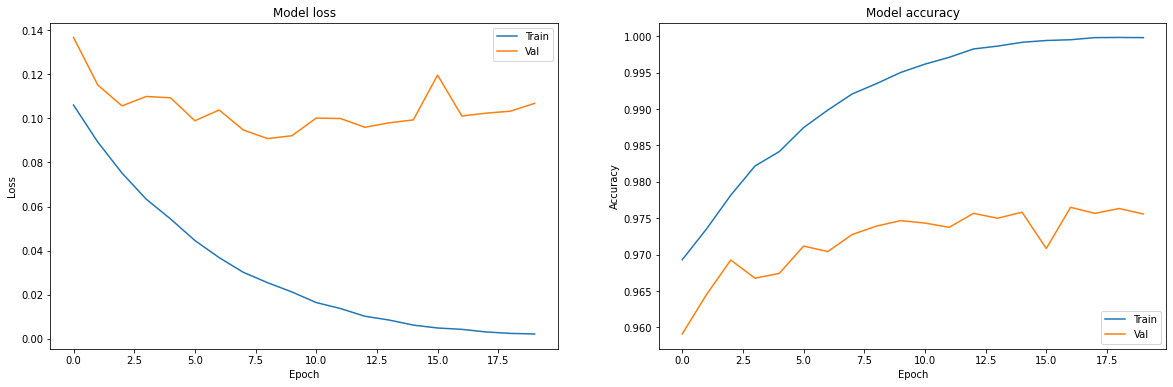

In [37]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
#plt.ylim((0,2))

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

## Save the model

In [38]:
model.save('mnist_ann.h5')

## Model Evaluation

In [39]:
model = load_model('mnist_ann.h5')

In [40]:
model.evaluate(X_test_1d, y_test_onehot)

313/313 [==============================] - 2s 8ms/step - loss: 0.0942 - accuracy: 0.9776


[0.09418627619743347, 0.9775999784469604]

## Make prediction on test set

In [41]:
y_pred_prob = model.predict(X_test_1d)

In [42]:
# example output
print('y_pred_prob shape : ', y_pred_prob.shape)
print('example : \n', y_pred_prob[0])

y_pred_prob shape :  (10000, 10)
example : 
 [9.74114626e-12 1.11807694e-07 1.86388016e-09 2.27123508e-07
 2.62028897e-12 2.99614666e-09 9.21341708e-15 9.99999523e-01
 4.97094199e-10 1.33786955e-07]


In [43]:
y_pred = list(map(np.argmax, y_pred_prob))

In [44]:
print('first 10 example')
print('y_test : ', y_test[:10])
print('y_pred : ', y_pred[:10])

first 10 example
y_test :  [7 2 1 0 4 1 4 9 5 9]
y_pred :  [7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


Prediction :  6


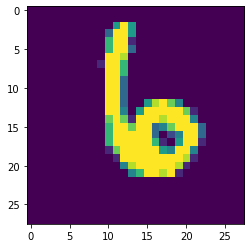

In [45]:
# example of image and prediction
randnum = np.random.randint(0,len(y_test))
plt.imshow(X_test[randnum])
print('Prediction : ', y_pred[randnum])

In [46]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 969,    0,    1,    1,    0,    0,    5,    1,    2,    1],
       [   0, 1123,    2,    0,    0,    0,    3,    2,    5,    0],
       [   2,    3, 1011,    4,    2,    0,    2,    4,    4,    0],
       [   0,    0,    5,  984,    0,    7,    0,    3,    9,    2],
       [   2,    0,    3,    1,  962,    0,    3,    1,    1,    9],
       [   3,    0,    0,   10,    2,  859,    7,    1,    7,    3],
       [   3,    2,    0,    1,    7,    3,  942,    0,    0,    0],
       [   0,    8,    9,    5,    0,    0,    0,  998,    3,    5],
       [   3,    0,    2,    5,    2,    3,    3,    3,  950,    3],
       [   4,    3,    0,    4,   12,    2,    0,    3,    3,  978]])

# Homework 2.2 : MNIST dataset with CNN 
input type : 28x28 pixels, 1 channel  
model : CNN

## Load the dataset (Train-test datasets)

In [47]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (60000, 28, 28)
y_train shape =  (60000,)
X_test shape =  (10000, 28, 28)
y_test shape =  (10000,)


label =  3


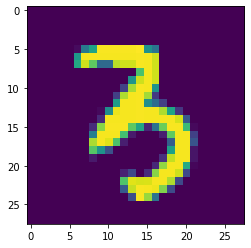

In [48]:
# data example
randnum = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[randnum])
print('label = ', y_train[randnum])

## Data Preparation

In [49]:
# convert the data (X_train and X_test) to be 3D picture with 1 channel 
X_train_3d = np.expand_dims(X_train, 3)
X_test_3d = np.expand_dims(X_test, 3)

print('X_train shape = ', X_train_3d.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test_3d.shape)
print('y_test shape = ', y_test.shape)

X_train shape =  (60000, 28, 28, 1)
y_train shape =  (60000,)
X_test shape =  (10000, 28, 28, 1)
y_test shape =  (10000,)


In [50]:
# convert the label (y_train and y_test) to be categorical 
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)

print('X_train shape = ', X_train_3d.shape)
print('y_train shape = ', y_train_onehot.shape)
print('X_test shape = ', X_test_3d.shape)
print('y_test shape = ', y_test_onehot.shape)

X_train shape =  (60000, 28, 28, 1)
y_train shape =  (60000, 10)
X_test shape =  (10000, 28, 28, 1)
y_test shape =  (10000, 10)


In [51]:
# check X_train data type
print(X_train_3d.dtype)
print(X_train_3d.min())
print(X_train_3d.max())

uint8
0
255


In [52]:
# change the data type to float32 and normalize the data
X_train_3d = X_train_3d.astype('float32')/255
X_test_3d = X_test_3d.astype('float32')/255

In [53]:
# check X_train data type
print(X_train_3d.dtype)
print(X_train_3d.min())
print(X_train_3d.max())

float32
0.0
1.0


## The model

In [54]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD

In [55]:
# create the CNN model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [56]:
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
# print model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


In [58]:
# fit the model
history = model.fit(X_train_3d, y_train_onehot, epochs=30, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2656 - accuracy: 0.9197 - val_loss: 0.1005 - val_accuracy: 0.9717
Epoch 2/30
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0860 - accuracy: 0.9747 - val_loss: 0.0743 - val_accuracy: 0.9771
Epoch 3/30
1500/1500 [==============================] - 32s 21ms/step - loss: 0.0556 - accuracy: 0.9834 - val_loss: 0.0569 - val_accuracy: 0.9827
Epoch 4/30
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0397 - accuracy: 0.9872 - val_loss: 0.0544 - val_accuracy: 0.9838
Epoch 5/30
1500/1500 [==============================] - 31s 21ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0630 - val_accuracy: 0.9810
Epoch 6/30
1500/1500 [==============================] - 32s 22ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0508 - val_accuracy: 0.9862
Epoch 7/30
1500/1500 [==============================] - 30s 20ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0600 -

## Plot the learning curve

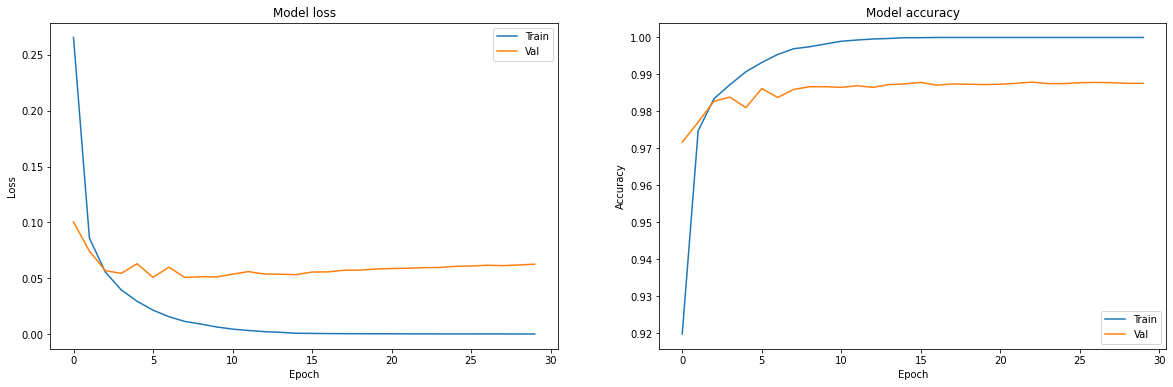

In [59]:
plt.figure(figsize=(20,6))

plt.subplot(121)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
#plt.ylim((0,2))

plt.subplot(122)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='lower right')
plt.show()

## Save the model

In [60]:
model.save('mnist_cnn.h5')

## Model evaluation

In [61]:
# load the saved model
model = load_model('mnist_cnn.h5')

In [62]:
# explore the model
model.get_weights()

[array([[[[-0.50572854,  0.17053813, -0.29024267, -0.17105314,
           -0.41211402,  0.6171978 ,  0.3779728 ,  0.40740758,
            0.28947988,  0.51012415,  0.31679654,  0.01940205,
           -0.16976538,  0.08339087, -0.05403702, -1.026621  ,
            0.2801109 ,  0.7120515 , -0.322203  , -0.01494045,
           -0.24020144,  0.31633058, -0.33669475,  0.9094108 ,
           -0.64656466,  0.11308336,  0.32593247,  0.20690934,
            0.80976325, -0.06303813,  0.24251533, -0.02120581]],
 
         [[-0.38129348,  0.1294308 , -0.8978309 , -0.35319483,
            0.3015371 ,  0.8552645 ,  1.040552  , -0.19768396,
            0.30373424,  0.69064415,  0.29183996, -0.13046554,
            0.12404695,  0.27833956, -0.18519568,  0.116607  ,
            0.21295638,  0.21313216, -0.09803703,  0.10098012,
           -0.4004641 ,  0.8752947 , -0.54689866, -0.30539688,
           -1.0440586 ,  0.31695086,  0.585852  ,  0.2801958 ,
            0.3021868 ,  0.04363283,  0.61057156,  

In [63]:
model.evaluate(X_test_3d, y_test_onehot, batch_size=32)

313/313 [==============================] - 2s 7ms/step - loss: 0.0547 - accuracy: 0.9876


[0.054744902998209, 0.9876000285148621]

## Make prediction on test set

In [64]:
y_pred_prob = model.predict(X_test_3d)

# example output
print('y_pred_prob shape : ', y_pred_prob.shape)
print('example : \n', y_pred_prob[0])

y_pred_prob shape :  (10000, 10)
example : 
 [1.1596045e-15 5.9773443e-13 1.3908065e-11 9.0806338e-12 7.7354121e-19
 2.6988443e-17 7.2584283e-21 1.0000000e+00 3.4084362e-15 1.5137421e-12]


In [65]:
# convert y_pred_prob to integer label
y_pred = list(map(np.argmax, y_pred_prob))

print('first 10 example')
print('y_test : ', y_test[:10])
print('y_pred : ', y_pred[:10])

first 10 example
y_test :  [7 2 1 0 4 1 4 9 5 9]
y_pred :  [7, 2, 1, 0, 4, 1, 4, 9, 6, 9]


Prediction :  7


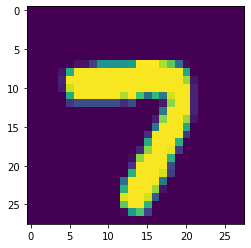

In [66]:
# example of image and prediction
randnum = np.random.randint(0,len(y_test))
plt.imshow(X_test[randnum])
print('Prediction : ', y_pred[randnum])

In [67]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[ 973,    1,    0,    0,    0,    2,    0,    1,    2,    1],
       [   0, 1130,    0,    1,    0,    0,    1,    1,    2,    0],
       [   1,    3, 1017,    0,    2,    0,    1,    7,    1,    0],
       [   0,    0,    3, 1000,    0,    3,    0,    1,    2,    1],
       [   0,    1,    3,    0,  971,    0,    2,    0,    1,    4],
       [   2,    0,    0,    6,    0,  879,    4,    0,    1,    0],
       [   4,    2,    0,    0,    2,    2,  947,    0,    1,    0],
       [   0,    1,    8,    1,    0,    1,    0, 1014,    1,    2],
       [   3,    0,    4,    2,    0,    1,    0,    2,  958,    4],
       [   2,    2,    0,    2,    7,    1,    1,    6,    1,  987]])